In [ ]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
def data_mnist_x(file, num_images):
  f = gzip.open(file,'r')

  image_size = 28
  f.read(16)
  buf = f.read(image_size * image_size * num_images)
  data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
  data = data.reshape(num_images, image_size, image_size, 1)
  print(data.shape)
  return data

def data_mnist_y(file, num_images):
  f = gzip.open(file,'r')
  f.read(8)
  data = []
  for i in range(0,num_images):   
      buf = f.read(1)
      labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
      data.append(labels)
      #print(labels)
  data = np.array(data)
  print(data.shape)
  
  return data


files = ["mnist/train-images-idx3-ubyte.gz", "mnist/train-labels-idx1-ubyte.gz",
         "mnist/t10k-labels-idx1-ubyte.gz", "mnist/t10k-images-idx3-ubyte.gz"]

x_train = data_mnist_x(files[0], 60000)
y_train = data_mnist_y(files[1], 60000)
x_test =  data_mnist_x(files[3], 10000)
y_test = data_mnist_y(files[2], 10000)

# print(x_train[1])
# print(y_train[1])


# image = np.asarray(data[2]).squeeze()
# plt.imshow(image)
# plt.show()


(60000, 28, 28, 1)
(60000, 1)
(10000, 28, 28, 1)
(10000, 1)


In [ ]:
##Normalize

x_train = x_train/255
x_test = x_test/255

print(x_test[1])

#print(x_train[1])

# FullSet = normalize_input(FullSet)
# print("FullSet :", FullSet.shape)

# plt.imshow(FullSet[555])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [ ]:
### Shapes

print("x_train: ", x_train.shape, "y_train", y_train.shape)
print("x_test: ", x_test.shape, "y_test", y_test.shape)

x_train:  (60000, 28, 28, 1) y_train (60000, 1)
x_test:  (10000, 28, 28, 1) y_test (10000, 1)


In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()   #Variable que tiene un paquete de como esta construida la red
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, verbose=True)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4247 - accuracy: 0.8778
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1199 - accuracy: 0.9653
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0771 - accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0569 - accuracy: 0.9835
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0422 - accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0355 - accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0254 - accuracy: 0.9926
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0212 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0176 - accuracy: 0.9953
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.014

Prediction:  0
Real:  [0]


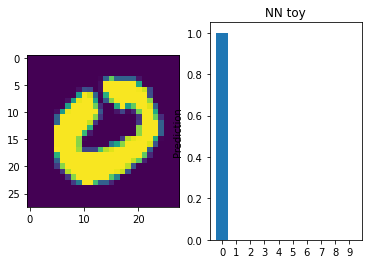

In [ ]:
import matplotlib.pyplot as plt
import random as randy

image_num = randy.randrange(0,400)
predictions = model.predict(x_test)
estimated_label = np.argmax(predictions[image_num])

print("Prediction: ", estimated_label)
print("Real: ", y_test[image_num])

x = ["CERO", "UNO", "DOS", "TRES", "CUATRO", "CINCO", "SEIS", "SIETE", "OCHO", "NUEVE"]

x = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
image = np.asarray(x_test[image_num]).squeeze()

plt.subplot(1,2,1), plt.imshow(image)
plt.subplot(1,2,2), plt.bar(x, predictions[image_num])
plt.title('NN toy')
plt.ylabel('Prediction')
plt.show()

**Fashion Mnist**


In [ ]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
def data_mnist_x(file, num_images):
  f = gzip.open(file,'r')

  image_size = 28
  f.read(16)
  buf = f.read(image_size * image_size * num_images)
  data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
  data = data.reshape(num_images, image_size, image_size, 1)
  print(data.shape)
  return data

def data_mnist_y(file, num_images):
  f = gzip.open(file,'r')
  f.read(8)
  data = []
  for i in range(0,num_images):   
      buf = f.read(1)
      labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
      data.append(labels)
      #print(labels)
  data = np.array(data)
  print(data.shape)
  
  return data


files = ["fashion/train-images-idx3-ubyte.gz", "fashion/train-labels-idx1-ubyte.gz",
         "fashion/t10k-labels-idx1-ubyte.gz", "fashion/t10k-images-idx3-ubyte.gz"]

x_train = data_mnist_x(files[0], 60000)
y_train = data_mnist_y(files[1], 60000)
x_test =  data_mnist_x(files[3], 10000)
y_test = data_mnist_y(files[2], 10000)

# print(x_train[1])
# print(y_train[1])


# image = np.asarray(data[2]).squeeze()
# plt.imshow(image)
# plt.show()

##Normalize

x_train = x_train/255
x_test = x_test/255

#print(x_test[1])

### Shapes

# print("x_train: ", x_train.shape, "y_train", y_train.shape)
# print("x_test: ", x_test.shape, "y_test", y_test.shape)

import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()   #Variable que tiene un paquete de como esta construida la red
model.add(keras.layers.Flatten(input_shape=(28, 28)))
#model.add(keras.layers.Dense(128, activation=tf.nn.relu))    #relu , sigmoid, tanh
model.add(keras.layers.Dense(128, activation=tf.nn.sigmoid))     #relu, sigmoid, tanh
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))   #sigmoid, softmax

# model.summary()

# ## Train
#opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])   #loss binary_crossentropy
model.fit(x_train, y_train, epochs=30, verbose=True)



(60000, 28, 28, 1)
(60000, 1)
(10000, 28, 28, 1)
(10000, 1)
Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7353 - accuracy: 0.7590
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4057 - accuracy: 0.8547
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3583 - accuracy: 0.8707
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3341 - accuracy: 0.8790
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3151 - accuracy: 0.8871
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2979 - accuracy: 0.8909
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2842 - accuracy: 0.8972
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2722 - accuracy: 0.8989
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2606 - accuracy: 0.9046
Epoch 10/30
1875/1875 

Prediction:  Dress
Real:  Dress


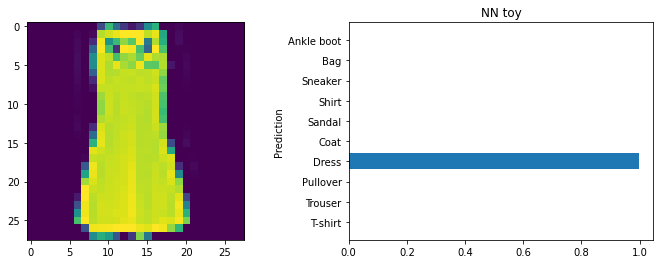

In [ ]:
import matplotlib.pyplot as plt
import random as randy

image_num = randy.randrange(0,400)
predictions = model.predict(x_test)
estimated_label = np.argmax(predictions[image_num])

labels = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


print("Prediction: ", x[estimated_label])
print("Real: ", x[int(y_test[image_num])])


#labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]



image = np.asarray(x_test[image_num]).squeeze()


fig = plt.figure(figsize=(12,4)) # set canvas size
plt.subplot(1,2,1), plt.imshow(image)
plt.subplot(1,2,2), plt.barh(labels, predictions[image_num])
plt.title('NN toy')
plt.ylabel('Prediction')
plt.show()